In [1]:
import numpy as np
from typing import Tuple
from sklearn.metrics import roc_auc_score
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [2]:
def split_members_into_n_groups(
        members,
        similarity_ratio: float = 1.,
        sizes = (0.4, 0.3, 0.2, 0.1)
):
    """ Split the data points into n groups. 
    
    The data points distribution similarity between the groups 
    depends on the similarity_ratio.
    """
    n_el = members.shape[0]
    n_identical = int(n_el * similarity_ratio)
    n_non_identical = n_el - n_identical

    # generate n parts with identical distributions
    split_locatinos = np.round((np.cumsum(sizes[:-1]) * n_identical), 0).astype(int)
    identical_parts = np.split(members[:n_identical], split_locatinos)

    # generate n parts with non-identical distributions
    split_locatinos = np.round((np.cumsum(sizes[:-1]) * n_non_identical), 0).astype(int)
    sorted_parts = np.split(np.array(sorted(members[n_identical:])), 
                            split_locatinos)

    members_fed = [
        np.concatenate((sorted_part, identical_part))
        for sorted_part, identical_part in zip(sorted_parts, identical_parts)
    ]

    return members_fed


def avg_roc_auc_fed(
        fm_members_fed,
        fp_members_fed,
        sizes = (0.4, 0.3, 0.2, 0.1)
):
    """ Generate the roc-auc scores for n data sets, their average and std.
    """
    roc_auc_fed = list()
    for fm, fp in zip(fm_members_fed, fp_members_fed):
        roc_auc_fed.append(
            roc_auc_score(
                y_true=np.concatenate((np.ones_like(fp), np.zeros_like(fm))),
                y_score=np.concatenate((fp, fm))
            )
        )
    
    roc_auc_fed = np.array(roc_auc_fed)
    return roc_auc_fed, np.sum(roc_auc_fed * sizes)


def plot_fed_distributions(fm_members_fed, fp_members_fed, n=4, fig_size=(7, 4)):

    fig1 = plt.figure(figsize=fig_size)
    with sns.color_palette("GnBu_d", n):
        for fm in fm_members_fed:
            sns.distplot(fm)
        plt.title("Model scores of the members belonging to the negative class for each one of the pods")
        plt.show()
            
    fig2 = plt.figure(figsize=fig_size)
    with sns.color_palette("YlOrRd", n):
        for fp in fp_members_fed:
            sns.distplot(fp)
        plt.title("Model scores of the members belonging to the positive class for each one of the pods")
        plt.show()

    return fig1, fig2


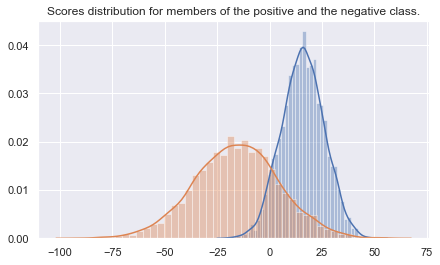

roc_auc score = 0.919


In [3]:
fig_size=(7, 4)
seed = 15
size = 4000  # number of data points
n = 4  # number of devices
equal_number_of_data_points_per_device = True

fp_mean, fp_std = 16, 10
fm_mean, fm_std = -16, 20

if equal_number_of_data_points_per_device is True:
    ratios = (0.25, 0.25, 0.25, 0.25)
else:
    ratios = (0.4, 0.3, 0.2, 0.1)

np.random.seed(seed)
fp_members = np.random.randn(size)*fp_std+fp_mean
fm_members = np.random.randn(size)*fm_std+fm_mean

fig = plt.figure(figsize=fig_size)
sns.distplot(fp_members);
sns.distplot(fm_members);
plt.title('Scores distribution for members of the positive and the negative class.')
plt.show()

score = roc_auc_score(
    y_true=np.concatenate((np.ones_like(fp_members), np.zeros_like(fm_members))),
    y_score=np.concatenate((fp_members, fm_members))
)

print(f'roc_auc score = {np.round(score,3)}')

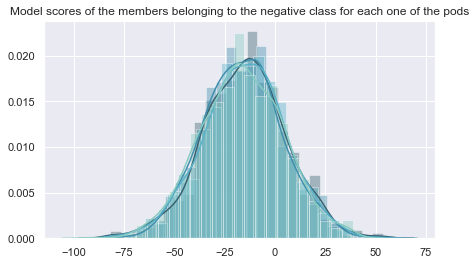

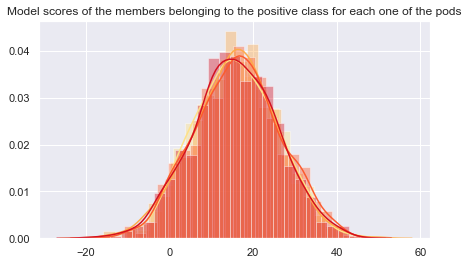

Scores:	 [0.912 0.924 0.921 0.921]
Avg score:	 0.919


In [4]:
similarity_ratio_p = 1
similarity_ratio_n = 1

fm_members_fed = split_members_into_n_groups(fm_members, similarity_ratio_p, ratios)
fp_members_fed = split_members_into_n_groups(fp_members, similarity_ratio_n, ratios)

fig1, fig2 = plot_fed_distributions(fm_members_fed, fp_members_fed, n=n, fig_size=fig_size)
roc_auc_scores, avg_score = avg_roc_auc_fed(fm_members_fed, fp_members_fed, ratios)

print('Scores:\t', np.round(roc_auc_scores,3))
print('Avg score:\t', np.round(avg_score,3))

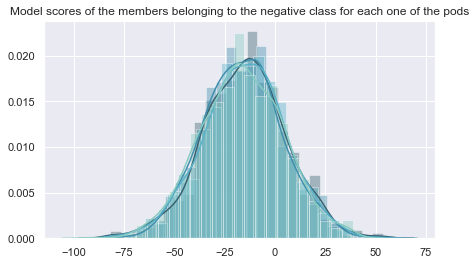

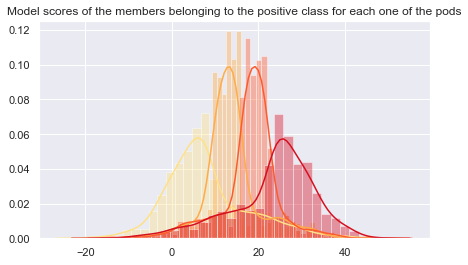

Scores:	 [0.851 0.925 0.942 0.958]
Avg score:	 0.919


In [8]:
similarity_ratio_p = 1
similarity_ratio_n = 0.4

fm_members_fed = split_members_into_n_groups(fm_members, similarity_ratio_p, ratios)
fp_members_fed = split_members_into_n_groups(fp_members, similarity_ratio_n, ratios)

fig1, fig2 = plot_fed_distributions(fm_members_fed, fp_members_fed, n=n, fig_size=fig_size)
roc_auc_scores, avg_score = avg_roc_auc_fed(fm_members_fed, fp_members_fed, ratios)

print('Scores:\t', np.round(roc_auc_scores,3))
print('Avg score:\t', np.round(avg_score,3))

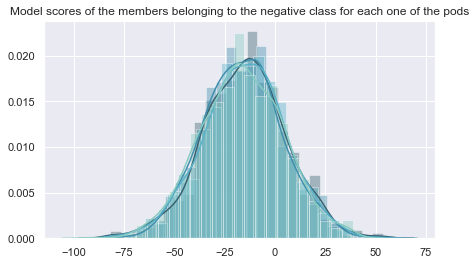

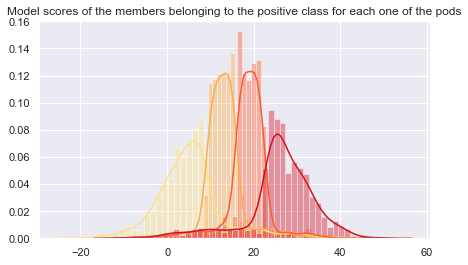

Scores:	 [0.83  0.924 0.949 0.97 ]
Avg score:	 0.918


In [6]:
similarity_ratio_p = 1
similarity_ratio_n = 0.2

fm_members_fed = split_members_into_n_groups(fm_members, similarity_ratio_p, ratios)
fp_members_fed = split_members_into_n_groups(fp_members, similarity_ratio_n, ratios)

fig1, fig2 = plot_fed_distributions(fm_members_fed, fp_members_fed, n=n, fig_size=fig_size)
roc_auc_scores, avg_score = avg_roc_auc_fed(fm_members_fed, fp_members_fed, ratios)

print('Scores:\t', np.round(roc_auc_scores,3))
print('Avg score:\t', np.round(avg_score,3))

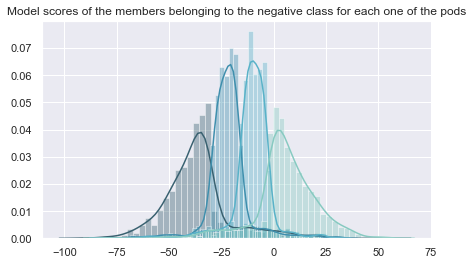

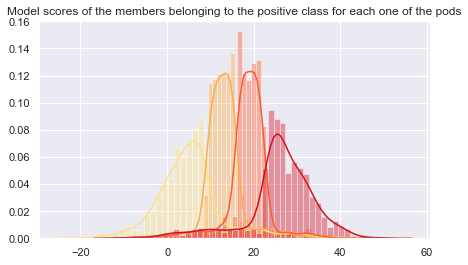

Scores:	 [0.97  0.985 0.988 0.897]
Avg score:	 0.96


In [7]:
similarity_ratio_p = 0.2
similarity_ratio_n = 0.2

fm_members_fed = split_members_into_n_groups(fm_members, similarity_ratio_p, ratios)
fp_members_fed = split_members_into_n_groups(fp_members, similarity_ratio_n, ratios)

fig1, fig2 = plot_fed_distributions(fm_members_fed, fp_members_fed, n=n, fig_size=fig_size)
roc_auc_scores, avg_score = avg_roc_auc_fed(fm_members_fed, fp_members_fed, ratios)

print('Scores:\t', np.round(roc_auc_scores,3))
print('Avg score:\t', np.round(avg_score,3))